<center>
  <img src="https://www.iasonltd.com/logo_full.svg" alt="Polimi Logo" width="200">
  <h4></h4>
  <h1> GenAI for Data Analysis </h1>
</center>

# Introduction

Welcome to the **GenAI for Data Analysis Challenge!** In this notebook, you'll explore how to leverage **Generative AI** techniques for data analysis, focusing on tool and model structures using **LangChain** with a Large Language Model (LLM), **LLaMA**. Your goal will be to analyze a **Yahoo Finance dataset** and build a model capable of generating automatic summaries and providing insightful feedback based on user queries.

As part of this challenge, you will learn:

- **Prompt engineering**: Learn how to craft effective prompts that guide the LLM to produce accurate and relevant results.
- **Binding tools to the LLM**: Discover how to enhance the LLM’s functionality by integrating external tools, making it more versatile and capable of complex data operations.
- **Utilizing LangGraph**: A key part of the challenge will involve working with **LangGraph**, a powerful framework that simplifies the process of connecting different tools and models, allowing you to build more dynamic and interactive AI systems.

By the end of this notebook, you will have hands-on experience in setting up a robust AI pipeline that transforms raw data into actionable insights and user-friendly summaries, all through the seamless integration of LangChain.


## Overview of LangChain

**LangChain** is a versatile framework designed to simplify the development of applications that leverage large language models (LLMs). It offers abstractions for creating custom tools, managing prompts and templates, handling conversational memory, and orchestrating complex workflows. LangChain empowers developers to build sophisticated data agents that interact seamlessly with various data sources and provide intelligent, context-aware responses.

**Key Features:**


*   **Prompt Management:** Create and manage dynamic prompts and templates.
*   **Tool Integration:** Connect LLMs with external APIs and data sources.
*   **Memory Handling:** Maintain conversational context and state across interactions.
*   **Chain Building:** Orchestrate multi-step processes and workflows.



For comprehensive documentation, visit the [LangChain Documentation](https://python.langchain.com/docs/introduction/#:~:text=LangChain%20is%20a%20framework%20for%20developing).

# Environment Setup

Before diving into the implementation, ensure that all necessary libraries are installed.

In [ ]:
# Install required libraries
!pip install langchain transformers pandas matplotlib torch langgraph langchain-ollama langchain_experimental duckduckgo-search --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 44.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.5/113.5 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.1/208.1 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 76.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 407.7/407.7 kB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 81.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49

*Note: The `--quiet` flag suppresses installation logs for a cleaner notebook interface.* *italicized text*

## Import Libraries

Import all necessary libraries for data manipulation, modeling, and LangChain functionalities.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# LangChain imports
from langchain import LLMChain, PromptTemplate
from langchain.agents import Tool, initialize_agent

from IPython.display import clear_output
from IPython.display import display, Markdown
import os
import threading
import subprocess
import requests
import json

from langchain_ollama import ChatOllama
from langchain_core.tools import tool
from langchain_core.messages import ToolMessage
from langchain_core.messages import HumanMessage
from langchain_core.messages.system import SystemMessage
import operator
from typing import Annotated, Sequence, TypedDict
from langgraph.graph.message import AnyMessage, add_messages
from langchain_core.messages import BaseMessage
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from typing import List
from langchain_core.prompts import (ChatPromptTemplate,AIMessagePromptTemplate, MessagesPlaceholder)
from langchain_core.messages import ToolMessage
from langchain.schema import HumanMessage, AIMessage
from langgraph.prebuilt import ToolInvocation
from langchain_core.runnables import RunnableLambda
from langgraph.prebuilt import ToolNode
from IPython.display import Image, display
from langgraph.graph import END, StateGraph, START
from langchain_community.tools import DuckDuckGoSearchRun
from langchain_experimental.utilities import PythonREPL

# Setting Up the Language Model: Llama

**What is Ollama?**

**Ollama** is an API platform that provides access to various machine learning models, including **LLaMA** and other advanced models. It allows users to easily interact with these models by offering an accessible and scalable API. With Ollama, you can perform tasks such as text generation, summarization, translation, and more using Large Language Models (LLMs).

In the context of this notebook, **Ollama** enables you to download and run models like **LLaMA** locally or remotely with minimal setup. This simplifies the process of integrating powerful machine learning models into your project without needing to manage the intricate details of model training, deployment, or scaling.


This code first installs `pciutils`, a set of tools used to manage PCI devices on the system. Then, it downloads and installs the Ollama API by executing a shell script fetched from the Ollama website using `curl`.

In [ ]:
!sudo apt-get install -y pciutils
!curl -fsSL https://ollama.com/install.sh | sh # download ollama api

The function `ollama()` configures the environment for the Ollama API by setting the `OLLAMA_HOST` to `0.0.0.0:11434` and allowing all origins through the `OLLAMA_ORIGINS` environment variable. It then starts the Ollama server by invoking the `ollama serve` command in a subprocess. A separate thread is initiated using Python's `threading` module to run the `ollama()` function concurrently, enabling the server to operate in the background while the main program continues execution.


In [ ]:
def ollama():
    os.environ['OLLAMA_HOST'] = '0.0.0.0:11434'
    os.environ['OLLAMA_ORIGINS'] = '*'
    subprocess.Popen(["ollama", "serve"])

ollama_thread = threading.Thread(target=ollama)
ollama_thread.start()
clear_output()

The command `!ollama pull llama3.2:3b` pulls the specific version `3b` of the `Llama 3.2` model using the Ollama API. After the model is downloaded, the `clear_output()` function is used to clear the output of the current cell, keeping the notebook interface clean. Additionally, different versions of the Llama model can be selected by specifying alternative version tags in the command, depending on the desired model size or version.


In [ ]:
!ollama pull llama3.2:3b
clear_output()

The `ChatOllama` object from LangChain is initialized with the `llama3.2:3b` model. We set the `temperature` to `0` for deterministic responses and `num_predict` to `-1` to allow unlimited token generation. LangChain's `ChatOllama` is used for seamless integration with the Ollama API, simplifying model interaction.


In [ ]:
model = ChatOllama(model="llama3.2:3b", temperature = 0, num_predict = -1)

Let's try out the model! You can ask queries to observe how the model responds to various inputs.

In [ ]:
response = model.invoke("Hello, how are you?")

response

AIMessage(content="I'm just a language model, so I don't have emotions or feelings like humans do. However, I'm functioning properly and ready to assist you with any questions or tasks you may have! How can I help you today?", additional_kwargs={}, response_metadata={'model': 'llama3.2:3b', 'created_at': '2024-10-22T08:51:57.911204847Z', 'message': {'role': 'assistant', 'content': ''}, 'done_reason': 'stop', 'done': True, 'total_duration': 2219369354, 'load_duration': 77858664, 'prompt_eval_count': 31, 'prompt_eval_duration': 25897000, 'eval_count': 47, 'eval_duration': 2072947000}, id='run-57620d74-7f4d-4a59-bdcd-eaa6cde3e508-0', usage_metadata={'input_tokens': 31, 'output_tokens': 47, 'total_tokens': 78})

The response includes detailed metadata, such as the number of input, output, and total tokens, along with additional information like model version, timestamps, and evaluation durations. This allows you to track the performance and usage of the model for each interaction.

If you want to display only the content of the response, you can use the following command:

In [ ]:
display(Markdown(response.content))

I'm just a language model, so I don't have emotions or feelings like humans do. However, I'm functioning properly and ready to assist you with any questions or tasks you may have! How can I help you today?

# Prompt Engineering and Tool Integration


Before we dive into the challenge, it's essential to understand the fundamentals of **prompt engineering** and **tool integration**. In this section, we'll explore how to effectively craft prompts to guide the Large Language Model (LLM) in generating precise and relevant outputs.

Additionally, we'll learn how to implement external tools that expand the LLM's capabilities, making it more versatile in handling complex tasks. Understanding these concepts will set a strong foundation for successfully completing the challenge ahead.

## Prompt Engineering

Below is an example of how to adjust the behavior of the LLM by setting a prompt template. In this case, the model is asked to respond in the style of the ancient philosopher Socrates. Feel free to experiment with different prompt styles and templates to observe how the LLM reacts to various scenarios.

In [ ]:
example_prompt_template = """
You are Socrates, the ancient philosopher known for your method of questioning to stimulate critical thinking. Respond to the following question using this style.

Question: {question}

Answer (in the style of Socratic dialogue):

"""

example_prompt = ChatPromptTemplate.from_template(example_prompt_template)

[**LCEL** (LangChain Expression Language)](https://python.langchain.com/v0.2/docs/concepts/#langchain-expression-language-lcel) is a powerful tool within LangChain that allows you to chain operations in a clean and intuitive way. Using the `|` (pipe) operator, LCEL simplifies the process of connecting components like prompts, language models, and tools.

For example, instead of writing multiple lines of code to pass a prompt into a model, you can use LCEL to combine them in a single, elegant expression as below:

In [ ]:
model_v1 = example_prompt | model

In [ ]:
response = model_v1.invoke({"question": "How are you?"})

display(Markdown(response.content))

My dear friend, I must ask, what do you mean by "how am I?" Are you inquiring about my physical state? My health? Or perhaps you wish to know the nature of my soul or my inner being?

Tell me, how is it that you would define a person's well-being? Is it not through their actions, their thoughts, and their relationships with others? And if so, then I must ask, what is it about myself that you seek to know?

Am I merely a vessel for the gods, or do I possess some inherent quality that makes me who I am? Or perhaps my "how" is but a fleeting moment in time, subject to change and impermanence?

Let us explore this question together, my friend. What is it about your inquiry into my state that you hope to uncover?

## Tool Integration

In this section, we’ll explore how to integrate external tools with the LLM to extend its capabilities. Tools enable the model to perform tasks beyond generating text, such as retrieving data or executing functions. This is crucial for making the model more dynamic and interactive.

Below is an example of how to create and integrate a tool using the `@tool` decorator. Notice the importance of the **docstring**, as it is used to define what the tool does - so a docstring MUST be provided.. The model reads the docstring to understand how to interact with the tool, so it’s essential to clearly describe the tool’s functionality.

In [ ]:
@tool
def get_current_weather(location: str) -> str:
    """
    Get the current weather for a given location.

    Args:
    location (str): The name of the location to get the weather for.

    Returns:
    str: A string describing the current weather.
    """

    if location.lower() == "milan":
        return "rainy"
    else:
        return "sunny"


The `bind_tools` method is used to link external tools to the language model, allowing the model to invoke these tools when necessary. In the example below, the `get_current_weather` tool is bound to the model:

In [ ]:
model_v2 = model.bind_tools(tools=[get_current_weather])

In [ ]:
query = "How is the weather in Milan?"
messages = [HumanMessage(query)]
response_1 = model_v2.invoke(messages)

response_1

AIMessage(content='', additional_kwargs={}, response_metadata={'model': 'llama3.2:3b', 'created_at': '2024-10-22T09:31:30.834084803Z', 'message': {'role': 'assistant', 'content': '', 'tool_calls': [{'function': {'name': 'get_current_weather', 'arguments': {'location': 'Milan'}}}]}, 'done_reason': 'stop', 'done': True, 'total_duration': 500357705, 'load_duration': 57697928, 'prompt_eval_count': 196, 'prompt_eval_duration': 25662000, 'eval_count': 19, 'eval_duration': 375130000}, id='run-55eab94a-76d9-4d48-964a-188fffd9ed49-0', tool_calls=[{'name': 'get_current_weather', 'args': {'location': 'Milan'}, 'id': '07fe3731-ba7d-4498-bdbd-2896f6529fcc', 'type': 'tool_call'}], usage_metadata={'input_tokens': 196, 'output_tokens': 19, 'total_tokens': 215})

As you can see from the output, the AI correctly identified and called the `get_current_weather` tool with the location set to "Milan". However, the tool has not been executed yet, as indicated by the empty content in the response.

The below loop manually invokes the tool for each call, and the result ("rainy" for Milan) is appended to the conversation.


In [ ]:
messages.append(response_1)

for tool_call in response_1.tool_calls:
    selected_tool = {"get_current_weather": get_current_weather}[tool_call["name"].lower()]
    tool_msg = selected_tool.invoke(tool_call)
    messages.append(tool_msg)

messages

[HumanMessage(content='How is the weather in Milan?', additional_kwargs={}, response_metadata={}),
 AIMessage(content='', additional_kwargs={}, response_metadata={'model': 'llama3.2:3b', 'created_at': '2024-10-22T09:31:30.834084803Z', 'message': {'role': 'assistant', 'content': '', 'tool_calls': [{'function': {'name': 'get_current_weather', 'arguments': {'location': 'Milan'}}}]}, 'done_reason': 'stop', 'done': True, 'total_duration': 500357705, 'load_duration': 57697928, 'prompt_eval_count': 196, 'prompt_eval_duration': 25662000, 'eval_count': 19, 'eval_duration': 375130000}, id='run-55eab94a-76d9-4d48-964a-188fffd9ed49-0', tool_calls=[{'name': 'get_current_weather', 'args': {'location': 'Milan'}, 'id': '07fe3731-ba7d-4498-bdbd-2896f6529fcc', 'type': 'tool_call'}], usage_metadata={'input_tokens': 196, 'output_tokens': 19, 'total_tokens': 215}),
 ToolMessage(content='rainy', name='get_current_weather', tool_call_id='07fe3731-ba7d-4498-bdbd-2896f6529fcc')]

Once the tool (`get_current_weather`) is executed and its result ("rainy") is added to the `messages`, the updated conversation (including the tool result) is sent back to the LLM:

In [ ]:
response_2 = model_v2.invoke(messages)

display(Markdown(response_2.content))

The current weather in Milan is rainy. If you'd like to know more about the forecast or conditions, I can try to find that information for you. Would you like me to check the weather forecast for Milan?

In this example, we manually handled the tool invocation and passed the result back to the LLM. However, this process will be managed dynamically once we create an agent with **LangGraph**. The agent will automatically identify, invoke tools, and integrate their results into the conversation flow without manual intervention, making the workflow more efficient and streamlined.

For more examples and different implementations of tools you can check the [documantation](https://python.langchain.com/v0.2/docs/concepts/#tools)

# Challenge

In this challenge, we will provide historical data and metadata obtained from **Yahoo Finance**. Your task is to create an agent capable of analyzing this data to:

1. **Generate automatic reports**: The agent should summarize key financial metrics and trends based on the data.
2. **Answer user queries**: The agent should respond to specific questions about the data, offering insights and explanations.

The goal is to integrate prompt engineering, tool usage, and LangGraph to build an intelligent system that can interact with financial data dynamically and provide meaningful feedback to the user.


##  Import Data

To create a dataset, we use **OpenBB** to import financial data from Yahoo Finance. The dataset consists of two parts:
- **Historical Price Data**: This includes daily stock prices for a variety of companies.
- **Metadata**: Provides additional information about the companies, such as market capitalization, sector, and key financial metrics.

To make the process easier, we’ve already extracted the data and uploaded it to GitHub for seamless import into your notebook. You can find the details of the dataset in the repository:

[https://github.com/havvanilsuoz/polimi_fintech](https://github.com/havvanilsuoz/polimi_fintech)

This allows you to quickly access and work with the data without needing to fetch it directly from Yahoo Finance.

Below are the URLs to each dataset

In [ ]:
url_historical_1 = 'https://raw.githubusercontent.com/havvanilsuoz/polimi_fintech/refs/heads/main/data/historical_data_1.csv'
url_historical_2 = 'https://raw.githubusercontent.com/havvanilsuoz/polimi_fintech/refs/heads/main/data/historical_data_2.csv'
url_metadata = 'https://raw.githubusercontent.com/havvanilsuoz/polimi_fintech/refs/heads/main/data/metadata.csv'

To work with the historical price data, we first load the two separate CSV files (`historical_data_1.csv` and `historical_data_2.csv`) into pandas dataframes. Then, we combine them into a single dataframe.

In [ ]:
historical_1 = pd.read_csv(url_historical_1)
historical_2 = pd.read_csv(url_historical_2)

historical_df = pd.concat([historical_1, historical_2], ignore_index=True)

In [ ]:
historical_df

Expected Output

After loading and combining the historical price data, the resulting dataframe (`historical_df`) should contain **416,630 rows** and **10 columns**. The columns in the dataframe are as follows:

`date`, `open`, `high`, `low`, `close`, `volume`, `split_ratio`, `dividend`, `symbol`, `capital_gains`

These columns represent various stock price metrics such as the opening and closing prices, volume, and other financial details like splits, dividends, and capital gains for each stock symbol.


To work with the company metadata, we load the `metadata.csv` file into a pandas dataframe and set the `symbol` column as the index. We also drop the unnecessary column named `Unnamed: 0` that was likely created during the data export.

In [ ]:
metadata_df = pd.read_csv(url_metadata, index_col='symbol').drop(columns=['Unnamed: 0'])

In [ ]:
metadata_df

After loading the metadata, the resulting dataframe (`metadata_df`) contains **1,664 rows** and **49 columns**. This dataframe provides detailed information about various companies, including financial metrics, industry classifications, and performance indicators.

The columns in the `metadata_df` are as follows:

`country`, `industry`, `sector`, `longBusinessSummary`, `dividendRate`, `dividendYield`, `payoutRatio`, `beta`, `trailingPE`, `forwardPE`, `volume`, `averageVolume`, `marketCap`, `fiftyTwoWeekLow`, `fiftyTwoWeekHigh`, `currency`, `enterpriseValue`, `profitMargins`, `floatShares`, `sharesOutstanding`, `bookValue`, `priceToBook`, `netIncomeToCommon`, `trailingEps`, `pegRatio`, `lastSplitFactor`, `lastSplitDate`, `enterpriseToRevenue`, `enterpriseToEbitda`, `exchange`, `quoteType`, `underlyingSymbol`, `shortName`, `longName`, `firstTradeDateEpochUtc`, `totalCash`, `totalCashPerShare`, `ebitda`, `totalDebt`, `currentRatio`, `totalRevenue`, `debtToEquity`, `revenuePerShare`, `returnOnAssets`, `returnOnEquity`, `freeCashflow`, `operatingCashflow`, `operatingMargins`, `financialCurrency`

These columns provide comprehensive data points for each company, such as:
- **Industry and Sector Information**: Industry and sector classifications.
- **Financial Ratios**: Ratios like price-to-earnings (P/E), return on assets (ROA), and return on equity (ROE).
- **Stock Performance Metrics**: Market cap, 52-week high/low, and dividend information.
- **Company Overview**: Basic details like company names and long business summaries.

This data is essential for performing detailed financial analysis and comparisons.

## Tools

As part of the challenge, it is expected that you create and implement the following tools:

- **`generate_report`**: Generates a summary report for the top 5 companies based on financial performance and key metrics.
- **`plot_historical_price_data`**: Plots historical price data for a given list of stock symbols, with the option to specify a date range for more focused analysis.
- **`search`**: A tool to search for detailed explanations and news about specific tickers or companies. It is suggested to use **DuckDuckGoSearchRun** for this functionality.
- **`ticker_description`**: Provides descriptive statistics for a given symbol from the historical dataset, giving an overview of performance.

These tools are suggested starting points, but feel free to get creative and add additional tools or features that can enhance the agent's functionality and its interaction with financial data.

### Tool 1: Report

You will implement a tool called `generate_report` that provides a comprehensive financial analysis of a set of companies. Here are the components you need to include in your report:

1. **Comparison of Key Financial Metrics**: Generate a table comparing metrics like profit margins, return on equity (ROE), return on assets (ROA), and price-to-earnings ratios (trailing and forward) for the top 5 companies.
2. **Company Strengths and Weaknesses**: Analyze each company's financial strengths and weaknesses based on their performance relative to their peers.
3. **Company Details**: Include details like the most recent stock prices, six-month returns, market cap, and 52-week high/low prices.

Instructions:
- Use the provided dataset to prepare the necessary financial metrics and company data.
- Ensure that your tool outputs a report in markdown format, making it easy to read and interpret.
- Incorporate visual elements such as pie charts and historical price line plots to make your report more engaging and informative.
- Be creative and feel free to extend the tool with additional insights, data points, or custom visualizations.

The goal is to create a detailed and interactive tool that delivers a comprehensive analysis, leveraging both data and visual representations.

In [ ]:
@tool
def generate_report() -> str:
    """
    Generates a comprehensive financial analysis report for a set of companies.

    The report includes:
    1. A comparison of key financial metrics such as profit margins, return on equity,
       return on assets, price-to-earnings ratios (trailing and forward), revenue growth,
       and earnings growth.
    2. A detailed analysis of each company's strengths and weaknesses based on these metrics
       compared to their peers.


    Returns:
        str: A markdown-formatted financial analysis report containing:
            - A comparison table of key metrics.
            - A comparison table of company details.
            - A breakdown of each company's financial strengths and weaknesses.
    """
    # TO COMPLETE: Implement the logic to generate the financial report.
    # Use the provided dataset to calculate and compare the key metrics.
    # Analyze each company's performance and output the results as a markdown report.

    # Example steps:
    # 1. Prepare the data.
    # 2. Generate tables comparing key financial metrics.
    # 3. Analyze company strengths and weaknesses.
    # 4. Output the results in markdown format.



#### Example Output

PUT IMAGE OF SOLUTION RESPOND

### Tool 2: Plot Historical Data

This tool is designed to plot historical price data for a list of stock symbols within an optional date range. The function should:

1. Take a list of stock symbols (`symbol_list`) as input.
2. Optionally, take a start date and an end date (`start_date`, `end_date`) to filter the historical data.
3. Plot the historical price data for the provided symbols over the specified date range.
4. Save the plot as an image and return the file path to the saved plot.

Arguments:
- `symbol_list (List[str])`: The list of stock symbols to plot.
- `start_date (str, optional)`: The start date for the plot in the format `'YYYY-MM-DD'` (optional).
- `end_date (str, optional)`: The end date for the plot in the format `'YYYY-MM-DD'` (optional).

Returns:
- `str`: The file path to the saved plot image (`historical_plot.png`).

Instructions:
Your task is to complete this function by implementing the logic for filtering the data, creating the plot, and saving the image. Use `matplotlib` for plotting and ensure the date range is respected if provided.

In [ ]:
@tool
def plot_historical_price_data(symbol_list: List[str], start_date: str = None, end_date: str = None) -> str:
    """
    Plots historical price data for a list of stock symbols within an optional date range.

    Args:
        symbol_list (List[str]): List of stock symbols to plot.
        start_date (str, optional): Start date ('YYYY-MM-DD'). Defaults to None (all available data).
        end_date (str, optional): End date ('YYYY-MM-DD'). Defaults to None (all available data).

    Returns:
        str: File path to the saved plot image ('historical_plot.png').
    """

    # TO COMPLETE: Implement logic to filter historical data by date range and create a plot.
    # Steps:
    # 1. Convert date strings to datetime format.
    # 2. Filter the historical data for the specified symbols and date range.
    # 3. Create a plot using matplotlib.
    # 4. Save the plot as 'historical_plot.png'.
    # 5. Return the file path to the saved plot image.

    TO COMPLETE

### Tool 3: Search

The `search` tool uses **DuckDuckGoSearchRun**, which is a pre-built tool that leverages the DuckDuckGo search engine to retrieve relevant information from the web. This tool is useful for fetching external data, detailed explanations, or news related to specific tickers or companies. It allows the model to answer user queries by performing live searches and returning web results.

What is DuckDuckGoSearchRun?
**DuckDuckGoSearchRun** is a search utility that interacts with the DuckDuckGo search engine, which emphasizes privacy and provides quick, accurate search results. It’s helpful when you need information that isn’t available in the dataset or when you need up-to-date information from the web.

Instructions:
Your task is to write a clear and proper **description** for this tool, so that the LLM understands when to use it. The description should explain the specific scenarios where the tool would be relevant, such as when the model needs to provide detailed explanations, search for news, or retrieve external information about companies or stock tickers.


In [ ]:
search = DuckDuckGoSearchRun(
    name="search",
    description="TO COMPLETE"
)

### Tool 4: Ticker Description


The `ticker_description` tool is designed to return the descriptive statistics for a given stock ticker symbol. This function filters the historical data by the specified stock symbol and provides key statistical summaries such as opening price, high, low, close, and volume.

Arguments:
- `symbol (str)`: The stock ticker symbol to filter.

Returns:
- `str`: A markdown-formatted output of the descriptive statistics or a message indicating no data was found for the symbol.

Instructions:
1. The tool takes a stock ticker symbol (`symbol`) as an argument.
2. It filters the historical data (`historical_df`) for the given symbol.
3. It returns the descriptive statistics for that symbol's historical data in markdown format. The statistics include data like open, high, low, close, and volume.

In [ ]:
@tool
def ticker_description(symbol: str) -> str:
    """
    Returns the descriptive statistics for the given symbol from the historical_df DataFrame.

    Args:
        symbol (str): The stock ticker symbol to filter.

    Returns:
        str: The .describe() output for the symbol's historical data in markdown format.
    """
    # TO COMPLETE: Implement logic to filter historical data and generate descriptive statistics.
    # Steps:
    # 1. Filter the DataFrame for the given symbol.
    # 2. Check if data exists for the symbol, return an appropriate message if not.
    # 3. Generate descriptive statistics using the .describe() method.
    # 4. Format the output in markdown.

    TO COMPLETE

### Tool 5 and More (Optional)

In addition to the core tools, you are encouraged to create any additional tools that you think would be useful for further analysis or insights. These tools could perform deeper data analysis, generate visualizations, or answer specific queries based on the data. This part is completely optional, but feel free to get creative and explore new ways to analyze or visualize the financial data.

Some ideas for additional tools could include:
- Calculating moving averages or other technical indicators.
- Performing sentiment analysis on company news.
- Creating custom visualizations or dashboards.
- Comparing companies based on specific performance metrics.

Let your imagination guide you—there are no limits to the kinds of tools you can create to enhance the project.

## Prompts

In this part, we will work with two different types of prompts to guide the LLM’s behavior and outputs:

1. **Chat Prompt**: This will serve as the main prompt that the LLM uses to answer general questions from users. It will handle conversational queries and respond dynamically based on the tools and data available.
   
2. **Report Prompt**: This is a custom-designed prompt specifically tailored to generate a structured output report. The goal is to create a prompt that ensures the LLM produces a well-organized and comprehensive financial report, including analysis, comparisons, and summaries.

These prompts allow us to control how the LLM interacts with both user queries and structured report generation.

### Prompt 1: Chat

When writing the main **Chat Prompt**, it’s important to ensure that the LLM behaves reliably and uses the tools effectively. The Chat Prompt should instruct the model to avoid hallucination or making up data, and it should clearly indicate that the model should rely on the tools to fetch accurate information.

Tips for Writing the Chat Prompt:
- **No Hallucination**: Explicitly tell the model not to guess, fabricate, or provide information without reliable data sources.
- **Stick to Tools**: Make it clear that the LLM should use the tools you’ve integrated to answer questions rather than attempting to import or create data on its own.
- **Professionalism and Clarity**: Ensure the prompt maintains a professional tone and instructs the LLM to be clear and precise in all responses.

A well-crafted prompt will ensure the LLM remains accurate, professional, and effective in answering questions based on the tools.


In [ ]:
chat_prompt_template = """

COMPLETE THE PROMPT

"""

### Prompt 2: Report

When designing the **Report Prompt**, you want to ensure the LLM generates a structured, comprehensive financial analysis report based strictly on the data provided by the tools. The prompt should clearly instruct the model to avoid fabricating any data and follow the predefined structure.

#### Tips for Writing the Report Prompt:
- **No Hallucination**: Instruct the model to avoid fabricating any information and only use the results from the tools.
- **Structured Output**: Define a specific structure for the report so that the LLM produces organized, easy-to-read outputs. You can specify section headers, tables, and paragraphs for each part of the analysis.
- **Clear and Consistent Layout**: Make sure to guide the model on how to present the data with consistency in formatting and detail.

For example, you can create a prompt that outlines the report structure with headers like:
- **Dataset Overview**: Explaining the number of companies and sector breakdown.
- **Company Overview**: Describing the companies included in the analysis.
- **Comparison Table**: Comparing key financial metrics such as Profit Margins, ROE, ROA, and P/E ratios.
- **Company Analysis**: Summarizing each company's strengths and weaknesses.
- **Market Capitalization and Price History**: Detailing metrics like market cap, current price, and returns.
- **Key Insights**: Highlighting the major findings and trends.

By explicitly defining these sections, you ensure the LLM produces a structured report that meets the requirements.

In [ ]:
report_prompt_template = """

TO COMPLETE

"""

## LangGraph


**LangGraph** is a framework that simplifies the integration of tools and models by organizing them into a graph-based structure. This allows for more dynamic and responsive AI systems. In LangGraph, the system is designed using **nodes** and **edges**, which define the relationships and flow of operations.

Nodes and Edges in LangGraph:
- **Nodes**: Each node represents a specific component or operation. For example, a node could be a tool (such as `generate_report` or `search`) or a prompt template that the model uses to generate responses. Nodes are the building blocks of LangGraph, and each one performs a distinct function.
  
- **Edges**: Edges define the relationships between nodes. They determine how data or results from one node are passed to another. For instance, an edge could connect a prompt node to a tool node, indicating that the result from the prompt should trigger the tool to execute. This creates a logical flow where operations depend on the output of previous nodes.

### `AgentState`

The `AgentState` class is a custom type definition using Python’s **`TypedDict`** and annotations to define the structure of an agent’s state in a conversation.

- **`TypedDict`**: A Python feature that allows you to define dictionaries with a specific structure, including the types of values that each key should hold. In this case, `AgentState` defines a dictionary where the key is `messages` and the value is a list of messages.
  
- **`messages: Annotated[list[AnyMessage], add_messages]`**:
  - **`list[AnyMessage]`**: This specifies that the `messages` key should hold a list of `AnyMessage` objects, which represent the different types of messages the agent handles (e.g., user queries, tool responses, etc.).
  - **`Annotated`**: An annotation that allows for additional metadata to be associated with the `messages`. In this case, the `add_messages` function is added as metadata, possibly to modify or validate the `messages` list dynamically.
  
Purpose:
This structure is used to track the agent's state, particularly the conversation history (`messages`). The `add_messages` annotation likely provides additional functionality, such as updating or appending new messages during the interaction.

Overall, the `AgentState` class provides a typed and annotated way to maintain the conversation flow within the agent.

In [ ]:
class AgentState(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]

### Binding Tools to the LLM

Once you've created the tools (e.g., `generate_report`, `plot_historical_price_data`, `search`, etc.), you should combine them into a list and bind them to the LLM. This allows the LLM to call the appropriate tool when needed.

In [ ]:
tools = [generate_report, plot_historical_price_data, search, ticker_description]
model_with_tool = model.bind_tools(tools)

### Nodes

In this section, we define how to build and manage **Nodes** that interact with tools and handle potential errors. These nodes are responsible for managing the flow of information between the tools and the LLM during the conversation.

`chatbot`:
The `chatbot` function processes the conversation state and decides which prompt (either `report` or `chat`) to use based on the last message received. It then prepares the message with the appropriate prompt and invokes the model with the list of messages.

- **Messages Handling**: If the last message is from a tool (like `generate_report`), the function uses the `report_prompt_template`. Otherwise, it defaults to the `chat_prompt_template`.
- **Prompt Insertion**: A `SystemMessage` is created from the chosen prompt and added to the list of messages.
- **Model Invocation**: The model is invoked with the updated list of messages and tools.

In [ ]:
def chatbot(state: AgentState):
  messages = state['messages']
  if messages and isinstance(messages[-1], ToolMessage):
    if messages[-1].name == "generate_report":
      prompt_template = report_prompt_template
    else:
      prompt_template = chat_prompt_template

  else:
    prompt_template = chat_prompt_template

  prompt = ChatPromptTemplate.from_messages(prompt_template)

  # Create the HumanMessage from the chosen template
  prompt_message = SystemMessage(content=prompt_template)

  # Add the prompt to the messages list
  messages_with_prompt = [prompt_message] + messages

  # Invoke the model with the current messages and prompt
  response = model_with_tool.invoke(messages_with_prompt)

  #response = model_with_tool.invoke(messages)
  return {"messages": [response]}

`create_tool_node_with_fallback`:
This function creates a **ToolNode** that connects the list of tools to the model. The node also includes a fallback mechanism, ensuring that if an error occurs when invoking a tool, it can handle it gracefully.

- **ToolNode**: This node is responsible for managing interactions with the tools.
- **Fallbacks**: The node includes fallbacks using `RunnableLambda` to handle potential tool errors. If an exception occurs, the fallback handles the error and prevents the system from crashing.

`handle_tool_error`:
This function defines how to manage errors when invoking tools. It retrieves the error message and the last tool call, then returns an error message indicating that something went wrong and asking the user to correct it.

- **Error Handling**: The function looks for any errors in the conversation state and returns a `ToolMessage` indicating the issue.
- **Tool Call Reference**: The error message refers to the specific tool call that failed, making it easier for users to identify and fix the issue.

In [ ]:
def create_tool_node_with_fallback(tools: list) -> dict:
    return ToolNode(tools).with_fallbacks(
        [RunnableLambda(handle_tool_error)], exception_key="error"
    )


def handle_tool_error(state: AgentState) -> dict:
    error = state.get("error")
    tool_calls = state["messages"][-1].tool_calls
    return {
        "messages": [
            ToolMessage(
                content=f"Error: {repr(error)}\n please fix your mistakes.",
                tool_call_id=tc["id"],
            )
            for tc in tool_calls
        ]
    }


### Condition for Edges

In LangGraph, **Edges** represent the flow between nodes, dictating how and when data moves from one node to another. Conditions on edges determine the next step in the process based on the current state of the conversation.

`should_continue`:
The `should_continue` function acts as a condition that decides the next step in the conversation flow. Based on the state of the conversation (i.e., the last message), this function determines whether the flow should proceed to a tool node or stop the conversation.

- **Messages Handling**: The function checks the list of messages in the conversation state.
- **Tool Call Check**: If the last message contains tool calls (i.e., a tool was invoked), the function returns `"tool_node"`, indicating that the flow should proceed to the tool node to handle the tool execution.
- **End Condition**: If there are no tool calls in the last message, the function returns `END`, meaning the conversation flow should stop.

This conditional logic ensures that the conversation either continues to the tool node (if a tool is required) or concludes the process if no further actions are needed.

In [ ]:
def should_continue(state: AgentState):
    messages = state["messages"]
    last_message = messages[-1]
    if last_message.tool_calls:
        return "tool_node"
    return END

### Define LangGraph

Now, let's create our LangGraph using the components we have developed so far. We will combine the chatbot, tool nodes, and conditional logic into a structured workflow.

- **Define the Graph**: We start by defining a state graph using `StateGraph(AgentState)` to manage the conversation's state.
- **Add Nodes**:
  - `chatbot`: This node processes user queries and selects the appropriate prompt (chat or report).
  - `tool_node`: This node manages the execution of tools, such as `generate_report` or `search`, with fallback handling for any errors.
- **Add Edges**:
  - We connect the `chatbot` node to the start (`START`), and use the `should_continue` function to check if the flow should move to the `tool_node` or end.
  - After the tool is executed, the conversation flow returns to the `chatbot` node for further processing.
- **Compile the Workflow**: Finally, we compile the graph into an operational app (`app`), enabling dynamic conversation management where the LLM can handle queries, invoke tools, and manage errors.

In [ ]:
# Define a new graph
workflow = StateGraph(AgentState)

workflow.add_node('chatbot', chatbot)
workflow.add_node('tool_node', create_tool_node_with_fallback(tools))

workflow.add_edge(START, 'chatbot')
workflow.add_conditional_edges('chatbot', should_continue)

workflow.add_edge("tool_node", "chatbot")

app = workflow.compile()


Now, let's visualize the graph we have created to see how the conversation and tool nodes are connected. The following code attempts to display the graph in an image format

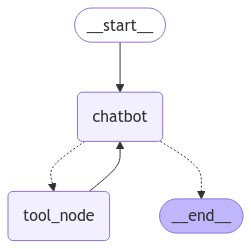

In [ ]:
try:
    display(Image(app.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

## Try Your Agent!

Now that your agent is fully set up, it should be able to answer a wide range of questions by leveraging the tools you’ve created. Here are some example queries to try:

- **"Can you generate the report?"**: This should trigger the agent to create a financial analysis report based on the top 5 companies.
- **"Can you plot the historical price data of NVO?"**: The agent should be able to plot the historical price data for the specified ticker.
- **"Can you plot the historical price data of NVO and ASML from February 2023 to July 2023?"**: The agent will use the specified date range and symbols to create a historical price chart.
- **"What is the ticker SAP? Can you explain?"**: The agent should retrieve detailed information about the ticker SAP.
- **"Can you provide me the key statistics of the historical data of the ticker NVO?"**: The agent should return the descriptive statistics for the given ticker symbol based on the historical data.

Feel free to ask these questions and more to test the agent’s capabilities!

In [ ]:
response = app.invoke({"messages": ("user", "Can you generate the report?")})

display(Markdown(response['messages'][-1].content))

# Take It Further: Improve Your Data Analysis Agent!

Now that you've created a functional data analysis agent, it's time to get creative! You can improve and expand on this project with your team by:

- Adding more tools for in-depth data analysis.
- Enhancing visualizations with advanced plots and charts.
- Implementing additional features, like predictive models or real-time data fetching.
- Making the agent more complex with new workflows or nodes.
- Improving the user interface for a better experience.

We encourage you to experiment, collaborate with your team, and make this agent as robust and innovative as possible.

### Share Your Work with Us

Once you’ve made your improvements, please submit the notebook by filling out the following details:

- **Team Member Names**:
- **Email Addresses**:

Please send the completed notebook to **havvanilsu.oz@iasonltd.com**. We’re excited to see your creativity and ideas! You may be contacted for potential opportunities based on your work.
